# At rest and in motion dataset t-SNE

In [1]:
import numpy as np
import scipy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler, LabelEncoder
import sklearn.manifold as skm
import seaborn as sns
from collections import OrderedDict
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

In [2]:
def create_array(df):
    scaled = True
    arr = np.array(df["Signal"])
    arr_numpy = []
    for i in range(len(arr)):
        arr[i] = arr[i].replace("[","")
        arr[i] = arr[i].replace("\n","")
        arr[i] = arr[i].replace("]","")
        float_list = []
        for item in arr[i].split():  
            float_list.append(float(item))
        arr_numpy.append(float_list)
        
    arr_numpy = np.array(arr_numpy)
    if scaled:
        scaler = StandardScaler()
        arr_numpy = scaler.fit_transform(arr_numpy.T).T
    return arr_numpy , np.array(df["Label"])

# DBSCAN

In [3]:
cpalette = ["#FF2D00", "#0050FF", "#00FF2D","#DD00FF", "#0C0052"]
def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

def NMI(y_true, y_pred):
    # Computes Simoized mutual information: where y_true and y_pred are both clustering assignments
    
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

    from sklearn.cluster import DBSCAN

#cpalette = ["#00A6AA", "#0000A6", "#FF4A46"]
cpalette = ["#FF2D00", "#0050FF", "#00FF2D","#DD00FF", "#0C0052"]

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)   
        ax.minorticks_on()
        ax.set_facecolor("whitesmoke")
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=8)
def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)   
        ax.minorticks_on()
        ax.set_facecolor("whitesmoke")
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=8)

In [4]:
# #plt.style.use('seaborn-ticks')
# perplexity=[1,5,10,15,20,25,30,35,1000]

# fig, ax =plt.subplots(3,3,figsize=(24,15))
# sns.set_theme()
# k=0
# j=0
# sns.color_palette("tab10")
# for i in perplexity:
# #     data_embedded2D = skm.TSNE(n_components=2,perplexity=i,random_state=0).fit_transform(ecg_mat_train)
# #     df1 = pd.DataFrame(data_embedded2D)

# #     df1 = df1.rename(columns={0: 'X', 1: "Y"})
#     df1['Label']=pd.Series(label_ecg_train)

#     sns.scatterplot(data=df1, x="X", y="Y", hue="Label", palette="bright", s=80, ax=ax[k][j])
#     ax[k][j].set_title("Perplexity = "+ str(i), fontsize=30)
#     plt.setp(ax[k][j].get_legend().get_texts(), fontsize=25) # for legend text
#     plt.setp(ax[k][j].get_legend().get_title(), fontsize=25) # for legend title

#     j=j+1 
#     if(j==3):
#         k=k+1
#         j=0
# plt.savefig('img/TSNE_ecg_filtered.png')
# plt.tight_layout()

In [5]:
ecg = pd.read_csv("../DATA_CSV/ECG_filtered_noscaled.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")
ppg = pd.read_csv("../DATA_CSV/PPG_filtered_noscaled.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

ecg_mat_train, label_ecg_train = create_array(ecg) 
ppg_mat_test, label_ppg_test = create_array(ppg) 

data_embedded2D = skm.TSNE(n_components=2,perplexity=30,random_state=0).fit_transform(ecg_mat_train)
df1 = pd.DataFrame(data_embedded2D)
df1 = df1.rename(columns={0: 'X', 1: "Y"})
df1['Label']=pd.Series(label_ecg_train)

In [7]:
ecg = pd.read_csv("../DATA_CSV/ECG_filtered_noscaled_cammina.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")
ppg = pd.read_csv("../DATA_CSV/PPG_filtered_noscaled_cammina.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

ecg_mat_train, label_ecg_train = create_array(ecg) 
ppg_mat_test, label_ppg_test = create_array(ppg) 

data_embedded2D = skm.TSNE(n_components=2,perplexity=30,random_state=0).fit_transform(ecg_mat_train)
df2 = pd.DataFrame(data_embedded2D)
df2 = df2.rename(columns={0: 'X', 1: "Y"})
df2['Label']=pd.Series(label_ecg_train)

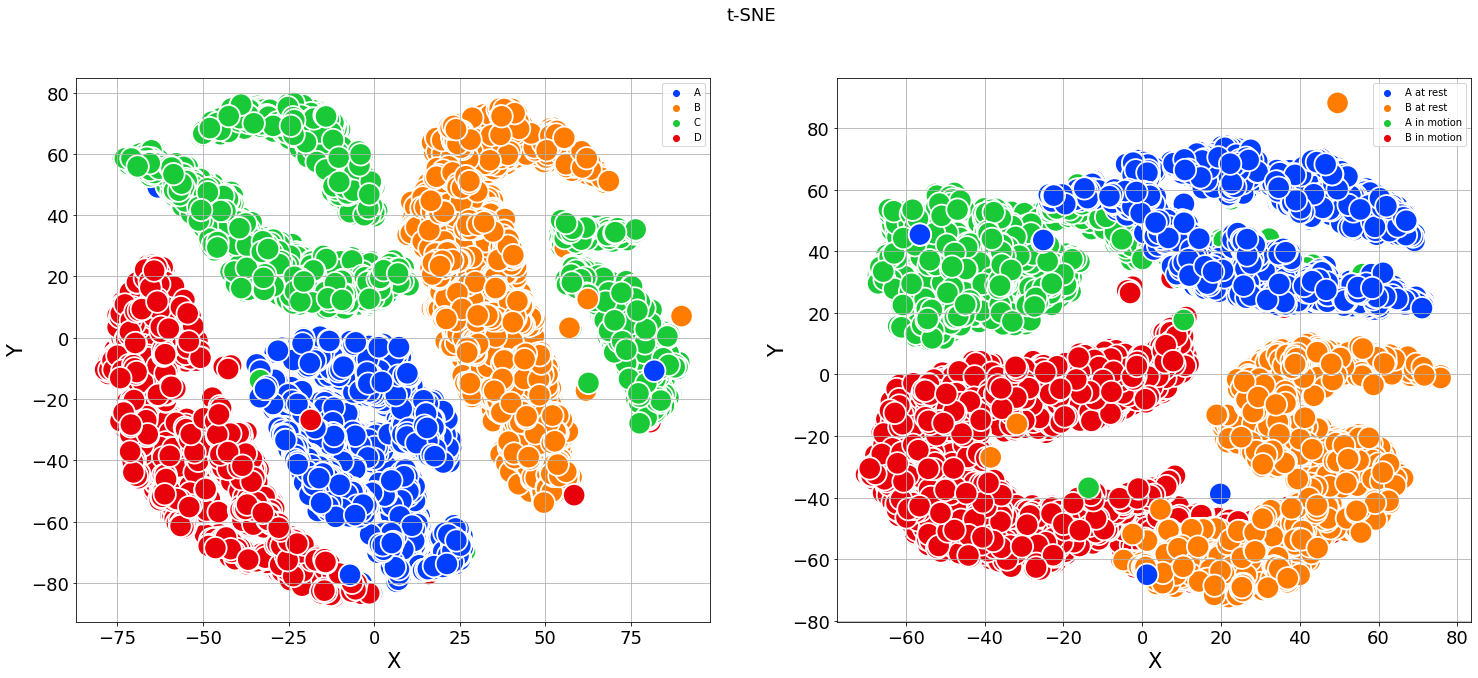

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,10)) 
fig.suptitle("t-SNE",fontsize=18) 
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]): 
    item.set_fontsize(21) 
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()): 
    item.set_fontsize(18)
sns.scatterplot(data=df1, x="X", y="Y", hue="Label", palette="bright", s=500, ax=ax1)
handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['A','B','C','D'])
ax1.grid() 

for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label]): 
    item.set_fontsize(21) 
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()): 
    item.set_fontsize(18) 
sns.scatterplot(data=df2, x="X", y="Y", hue="Label", palette="bright", s=500, ax=ax2)
handles, labels  =  ax2.get_legend_handles_labels()
ax2.legend(handles, ['A at rest','B at rest','A in motion','B in motion'])
ax2.grid() 

plt.savefig("./img/tsne.pdf")

In [ ]:
# #plt.style.use('seaborn-ticks')
# perplexity=[1,5,10,15,20,25,30,35,1000]

# fig, ax =plt.subplots(3,3,figsize=(24,15))
# sns.set_theme()
# k=0
# j=0
# sns.color_palette("tab10")
# for i in perplexity:
#     data_embedded2D = skm.TSNE(n_components=2,perplexity=i,random_state=0).fit_transform(ppg_mat_test)
#     df1 = pd.DataFrame(data_embedded2D)

#     df1 = df1.rename(columns={0: 'X', 1: "Y"})
#     df1['Label']=pd.Series(label_ppg_test)

#     sns.scatterplot(data=df1, x="X", y="Y", hue="Label", palette="bright", s=80, ax=ax[k][j])
#     ax[k][j].set_title("Perplexity = "+ str(i), fontsize=30)
#     plt.setp(ax[k][j].get_legend().get_texts(), fontsize=25) # for legend text
#     plt.setp(ax[k][j].get_legend().get_title(), fontsize=25) # for legend title

#     j=j+1 
#     if(j==3):
#         k=k+1
#         j=0
# plt.savefig('img/tsne_ppg_nofiltered_noscaled.png')
# plt.tight_layout()

### PPG 

In [ ]:
data_embedded= skm.TSNE(n_components=3,perplexity=30,random_state=0).fit_transform(ppg_mat_test)

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(data_embedded[label_ppg_test == 0,0], data_embedded[label_ppg_test == 0,1], data_embedded[label_ppg_test == 0,2])
ax.scatter3D(data_embedded[label_ppg_test == 1,0], data_embedded[label_ppg_test == 1,1], data_embedded[label_ppg_test == 1,2])
ax.scatter3D(data_embedded[label_ppg_test == 2,0], data_embedded[label_ppg_test == 2,1], data_embedded[label_ppg_test == 2,2])
ax.scatter3D(data_embedded[label_ppg_test == 3,0], data_embedded[label_ppg_test == 3,1], data_embedded[label_ppg_test == 3,2])
ax.view_init(elev=10, azim=40)
plt.show()

In [ ]:
label_encoder = LabelEncoder()
color = label_encoder.fit_transform(label_ppg_test)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=data_embedded[:,0],
    y=data_embedded[:,1],
    z=data_embedded[:,2],
    mode='markers',
    marker=dict(
        size=2,
        color = color,
        colorscale = 'Viridis',
        opacity = 0.7
    )
)])

fig.update_layout(scene = dict(
                    xaxis_title='First principal component',
                    yaxis_title='Second principal component',
                    zaxis_title='Third principal component'),
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()